Tugas Besar Pengolahan Citra Digital

**"Deteksi Plat Nomor Kendaraan Menggunakan Pengolahan Citra Klasik dan Optical Character Recognition"**

kelompok 7 :

1301210303_Tariq Fadly Ramadhan

1301210513_Reza Muammar Widyanto


In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d elysian01/car-number-plate-detection

Dataset URL: https://www.kaggle.com/datasets/elysian01/car-number-plate-detection
License(s): CC0-1.0
100% 2.68G/2.69G [00:36<00:00, 113MB/s]
100% 2.69G/2.69G [00:37<00:00, 77.9MB/s]


In [3]:
!unzip car-number-plate-detection.zip -d ./data


Archive:  car-number-plate-detection.zip
  inflating: ./data/Car_Number_Plate/00x500.jpg  
  inflating: ./data/Car_Number_Plate/1.jfif  
  inflating: ./data/Car_Number_Plate/1.png  
  inflating: ./data/Car_Number_Plate/10.jpg  
  inflating: ./data/Car_Number_Plate/10.png  
  inflating: ./data/Car_Number_Plate/11.jpg  
  inflating: ./data/Car_Number_Plate/11.png  
  inflating: ./data/Car_Number_Plate/1135560254.jpg  
  inflating: ./data/Car_Number_Plate/11793784.jpg  
  inflating: ./data/Car_Number_Plate/12.jpg  
  inflating: ./data/Car_Number_Plate/12.png  
  inflating: ./data/Car_Number_Plate/13.jpg  
  inflating: ./data/Car_Number_Plate/13.png  
  inflating: ./data/Car_Number_Plate/14.png  
  inflating: ./data/Car_Number_Plate/14.webp  
  inflating: ./data/Car_Number_Plate/15.jpg  
  inflating: ./data/Car_Number_Plate/15.png  
  inflating: ./data/Car_Number_Plate/16.png  
  inflating: ./data/Car_Number_Plate/17 (1).jpg  
  inflating: ./data/Car_Number_Plate/17.jpg  
  inflating: ./da

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(os.listdir('./data'))

['Car_Number_Plate']


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cek isi folder data
base_path = './data/Car_Number_Plate'
image_files = os.listdir(base_path)
print("Jumlah gambar dalam dataset:", len(image_files))
print("Contoh file:", image_files[:5])


Jumlah gambar dalam dataset: 931
Contoh file: ['IMG-20200222-WA0016.jpg', 'IMG_20200222_215720197.jpg', 'IMG20200222210135.jpg', 'IMG_20200222_155148.jpg', 'IMG_20200222_164757123_HDR.jpg']


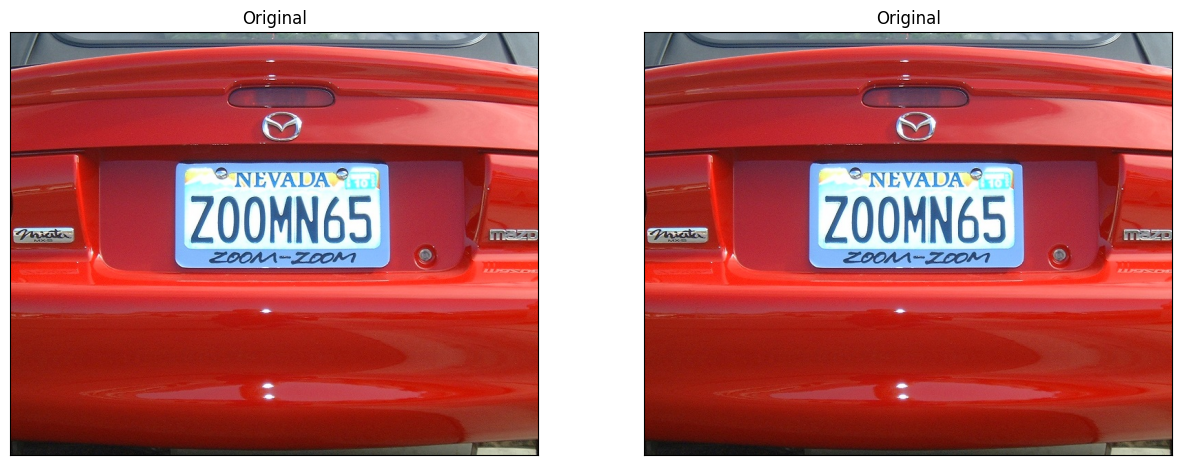

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_read(image1, image2, title1="", title2=""):
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

# Assuming your images are in './data/Car_Number_Plate/'
base_path = './data/Car_Number_Plate'
image_path = os.path.join(base_path, '10.png') # construct the full path

# Load the image, ensure it was loaded successfully
image = cv2.imread(image_path)

# Check if image loaded correctly
if image is not None:
    # Convert the image to RGB if needed (cv2 reads in BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plot_image = image_read(image, image, title1="Original", title2="Original")
    plt.show() # Display the plot
else:
    print(f"Error: Could not load image from {image_path}. Check the path and file.")

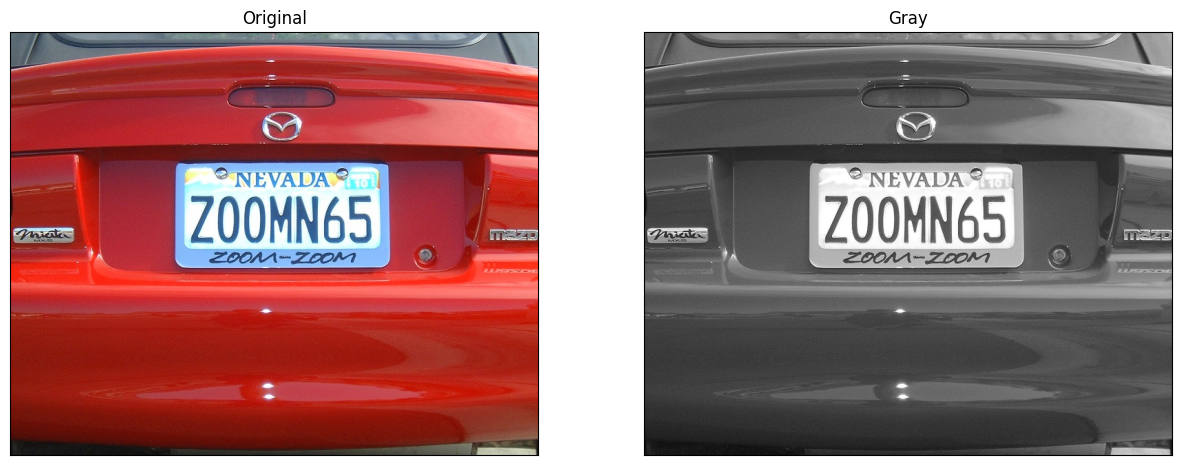

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

image_read(image, gray, title1 = "Original", title2 = "Gray")

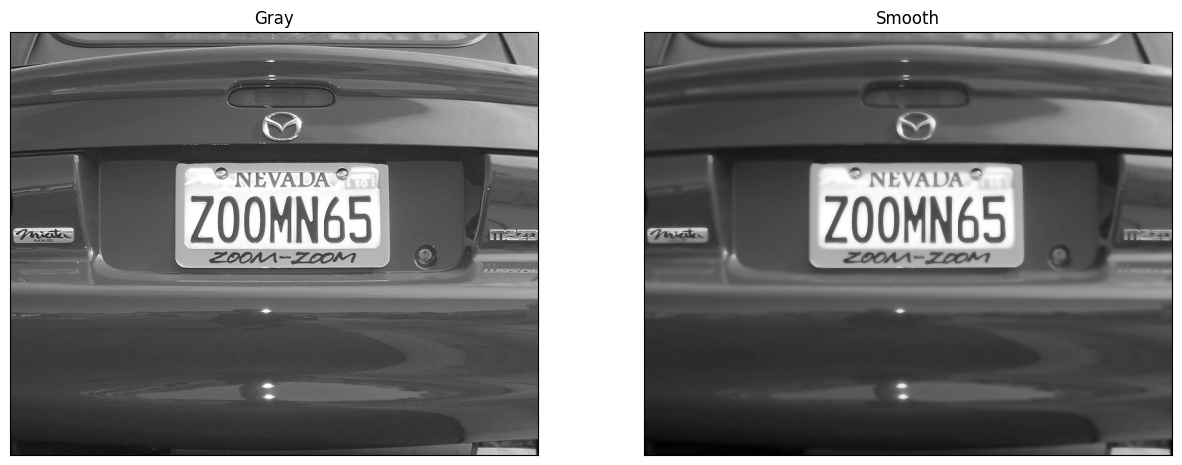

In [8]:
smooth = cv2.bilateralFilter(gray, 9, 75, 75)

image_read(gray, smooth, title1 = "Gray", title2 = "Smooth")

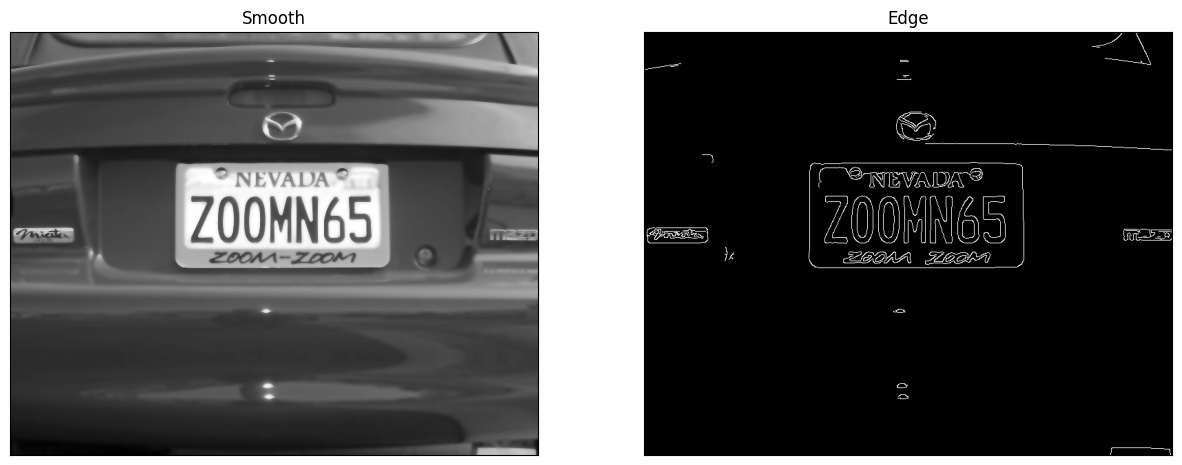

In [9]:
edge = cv2.Canny(smooth, 70, 400)
image_read(smooth, edge, title1 = "Smooth", title2 = "Edge")

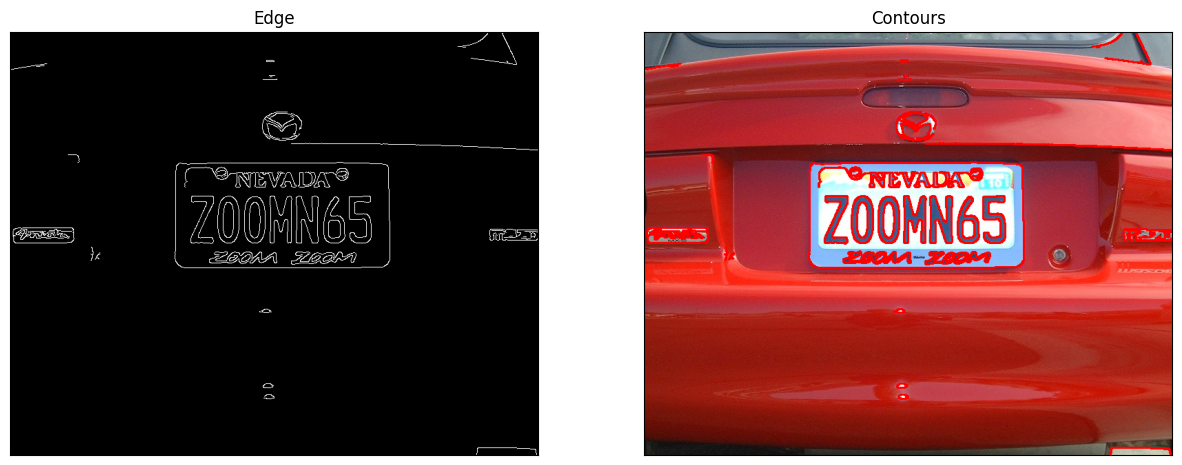

In [10]:
contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()

_ = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

image_read(edge, image_copy, title1 = "Edge", title2 = "Contours")

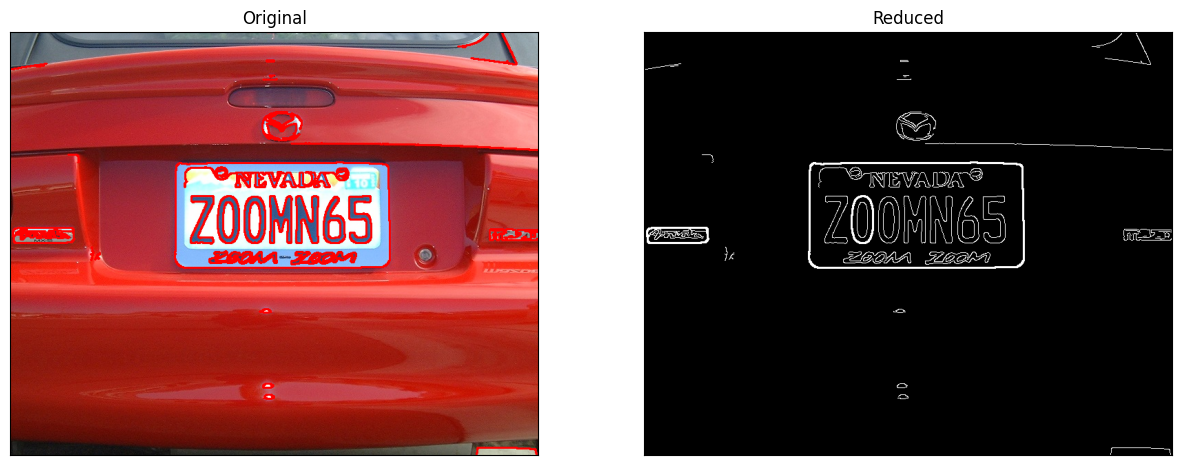

In [11]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

image_reduced = edge.copy()
_ = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

image_read(image_copy, image_reduced, title1 = "Original", title2 = "Reduced")

In [12]:
plate = None

for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.02 * a, True)
    if len(edge_count) == 4:  # Changed from 5 to 4 for a rectangular plate
        x, y, w, h = cv2.boundingRect(i)
        plate = image[y:y+h, x:x+w]
        license_plate = edge_count
        break

# Check if a plate was found before saving
if plate is not None:
    cv2.imwrite("plate.png", plate)
else:
    print("No license plate found in the image.")

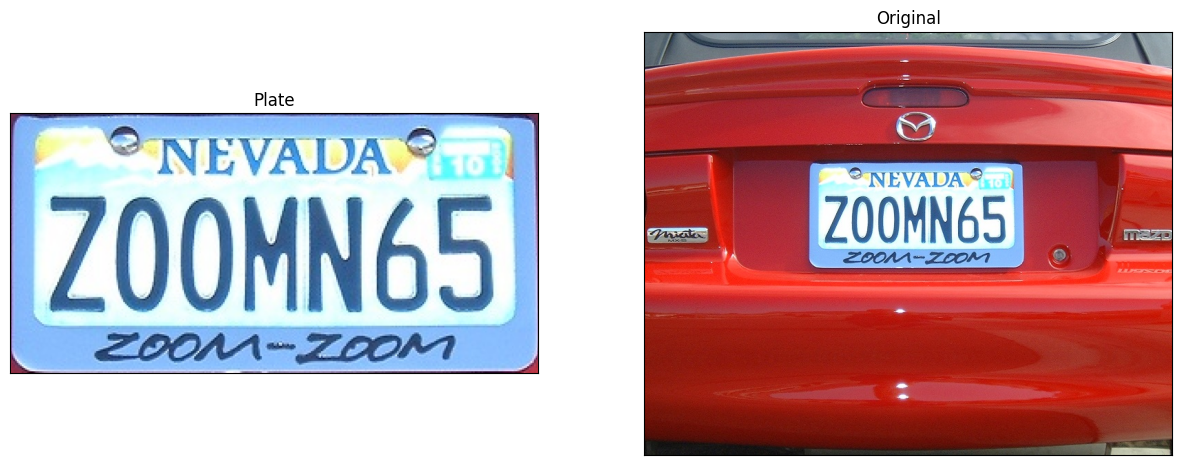

In [13]:
image_read(plate, image, title1 = "Plate", title2 = "Original")

In [14]:
mask = np.zeros(gray.shape, np.uint8)
cv2.drawContours(mask, [license_plate], 0, 255, -1)
plate_image = cv2.bitwise_and(image, image, mask=mask)

In [15]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,634 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

License Plate Number :  

= OOAA~ZOORT

 



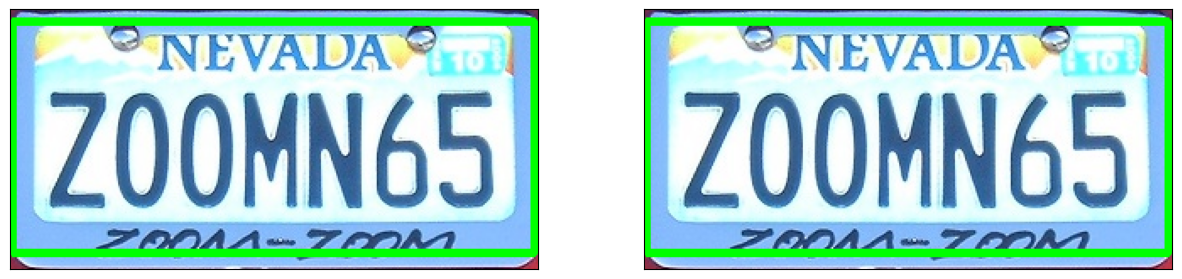

In [26]:
import pytesseract
plate_image_gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
plate_number = pytesseract.image_to_string(plate_image_gray)
image_read(plate, plate)
print("License Plate Number :", plate_number)

In [20]:
plate = None

for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.02 * a, True)
    if len(edge_count) == 4:
        x, y, w, h = cv2.boundingRect(i)
        plate = image[y:y+h, x:x+w]
        break

In [21]:
cv2.imwrite("plate.png", plate)


True

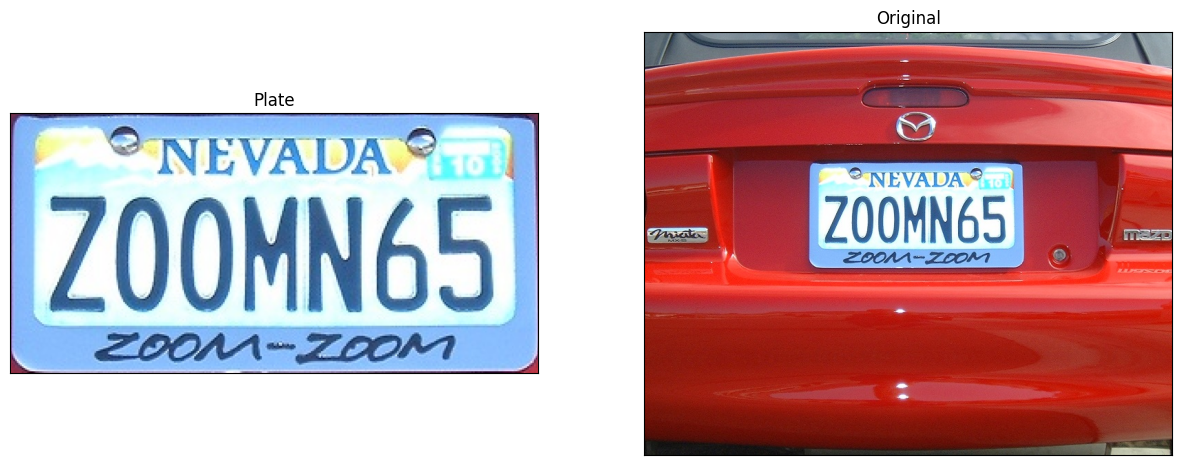

In [22]:
image_read(plate, image, title1 = "Plate", title2 = "Original")

In [23]:
!pip install easyocr
import easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 15.1 MB/s eta 0:00:00


In [24]:
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[80, 10], [228, 10], [228, 42], [80, 42]], 'NEVADA', 0.9886245880535534), ([[245, 21], [283, 21], [283, 41], [245, 41]], '"', 0.01532579299947745), ([[15, 39], [299, 39], [299, 131], [15, 131]], 'ZOOMN65', 0.9940019349531478), ([[52, 126], [152, 126], [152, 150], [52, 150]], 'ZooMA', 0.4196582498855552), ([[172, 126], [266, 126], [266, 150], [172, 150]], 'ZoDl', 0.19870732724666595)]


In [27]:
# Memformat hasil OCR
output_data = []
for detection in result:
    bounding_box = detection[0]
    text = detection[1]
    confidence = detection[2]
    output_data.append({
        "Bounding Box": bounding_box,
        "Text": text,
        "Confidence (%)": f"{confidence * 100:.2f}"
    })

# Konversi ke DataFrame untuk tampilan tabel
output_df = pd.DataFrame(output_data)
print(output_df)

                                       Bounding Box     Text Confidence (%)
0        [[80, 10], [228, 10], [228, 42], [80, 42]]   NEVADA          98.86
1      [[245, 21], [283, 21], [283, 41], [245, 41]]        "           1.53
2      [[15, 39], [299, 39], [299, 131], [15, 131]]  ZOOMN65          99.40
3    [[52, 126], [152, 126], [152, 150], [52, 150]]    ZooMA          41.97
4  [[172, 126], [266, 126], [266, 150], [172, 150]]     ZoDl          19.87


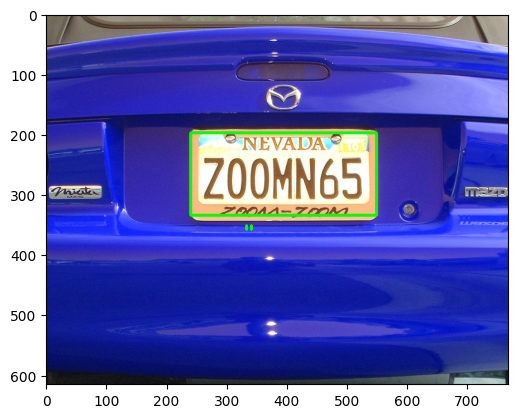

In [25]:
text = result[1][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text = text, org = (edge_count[0][0][0]-220, edge_count[3][0][1]+30), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 4)
res = cv2.rectangle(image, tuple(edge_count[0][0]), tuple(edge_count[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))